In [1]:
using LinearAlgebra
using Random
using Plots
using JLD2

In [2]:
lightorange = colorant"#fce5cd"
lightred = colorant"#f4ccccff"
blue = colorant"#4a86e8ff"
orange = colorant"#ff9900"
yellow = colorant"#ffd966"
red = colorant"#e06666ff"
gray = colorant"#b7b7b7"
lightblue = :lightblue1

function quiver_2d(v, c;anchor=[0, 0], reuse=false, kwargs...)
    f = reuse ? quiver! : quiver
    
    return f(
        [anchor[1]],
        [anchor[2]];
        quiver=([v[1]], [v[2]]),
        gridlinewidth=1,
        size=(400, 400),
        linewidth=2,
        color=c,
        kwargs...
    )
end

function quiver_2d!(args...; kwargs...)
    return quiver_2d(args...; reuse=true, kwargs...)
end

quiver_2d! (generic function with 1 method)

In [3]:
u = [3.730715974851937, 5.9812276954517]
v = [5.719253178808705, 1.4978688257024264]
w = [4.784982156361361, -2.9845727798815496]
x = [-1.2321927561258916, -6.809229243840987]

lim = (-10, 10)

(-10, 10)

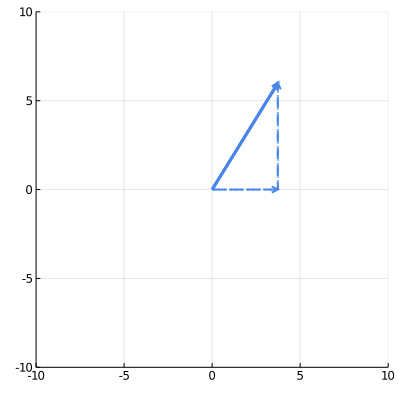

In [4]:
u1 = [u[1], 0]
u2 = [0, u[2]]

quiver_2d(u, blue; xlim=lim, ylim=lim, linewidth=3)
quiver_2d!(u1, blue; ls=:dashdot)
quiver_2d!(u2, blue; anchor=u1, ls=:dashdot)

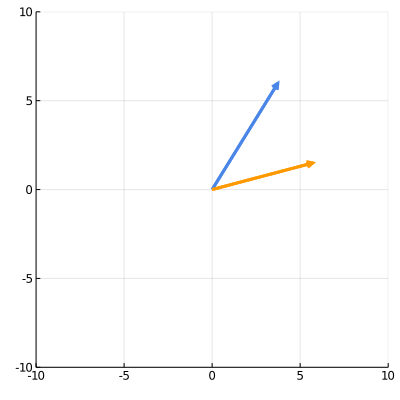

In [5]:
quiver_2d(u, blue; xlim=lim, ylim=lim, linewidth=3)
quiver_2d!(v, orange, linewidth=3)

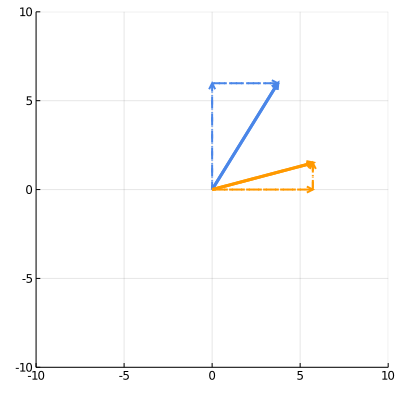

In [6]:
v1 = [v[1], 0]
v2 = [0, v[2]]

quiver_2d(u, blue; xlim=lim, ylim=lim, linewidth=3)
quiver_2d!(u2, blue; ls=:dashdot)
quiver_2d!(u1, blue; anchor=u2, ls=:dashdot)
quiver_2d!(v, orange, linewidth=3)
quiver_2d!(v1, orange, ls=:dashdot)
quiver_2d!(v2, orange, anchor=v1, ls=:dashdot)

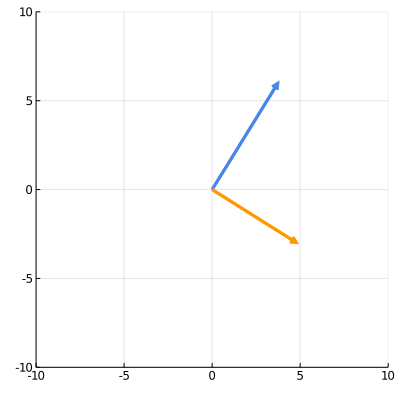

In [7]:
quiver_2d(u, blue; xlim=lim, ylim=lim, linewidth=3)
quiver_2d!(w, orange, linewidth=3)

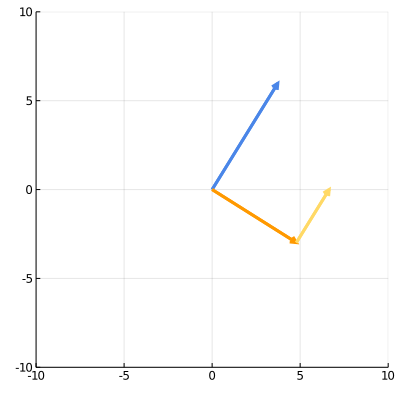

In [8]:
quiver_2d(u, blue; xlim=lim, ylim=lim, linewidth=3)
quiver_2d!(w, orange, linewidth=3)
quiver_2d!(0.5 * u, yellow; anchor=w, linewidth=3)

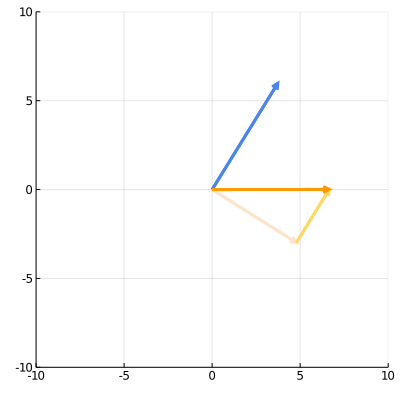

In [9]:
quiver_2d(u, blue; xlim=lim, ylim=lim, linewidth=3)
quiver_2d!(w, lightorange, linewidth=3)
quiver_2d!(0.5 * u, yellow; anchor=w, linewidth=3)
quiver_2d!(w + 0.5 * u, orange, linewidth=3)

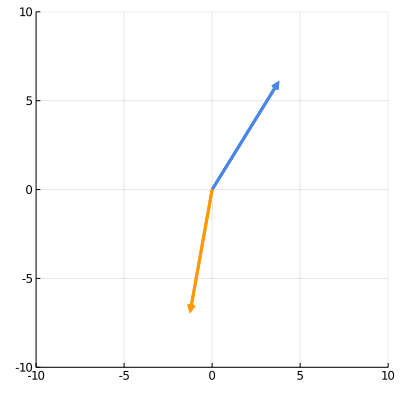

In [10]:
quiver_2d(u, blue; xlim=lim, ylim=lim, linewidth=3)
quiver_2d!(x, orange, linewidth=3)

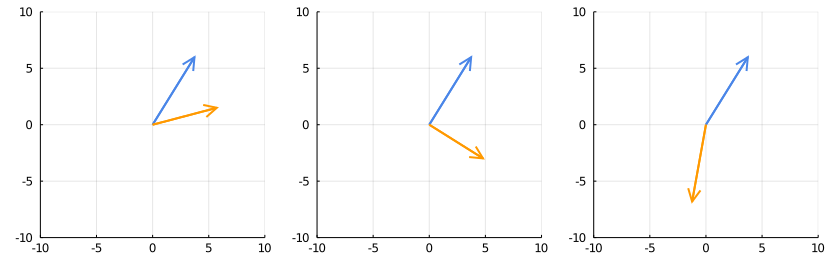

In [11]:
quiver_2d(u, blue; xlim=lim, ylim=lim)
p1 = quiver_2d!(v, orange)

quiver_2d(u, blue; xlim=lim, ylim=lim)
p2 = quiver_2d!(w, orange)

quiver_2d(u, blue; xlim=lim, ylim=lim)
p3 = quiver_2d!(x, orange)

l = @layout [a b c]

plot(p1, p2, p3; layout=l, size=(830, 260))

In [12]:
# NOTE: Run `perceptron.ipynb` before running this cell.
@load "data/perceptron.jld2" A n N X_pos X_neg X T

7-element Array{Symbol,1}:
 :A
 :n
 :N
 :X_pos
 :X_neg
 :X
 :T

In [13]:
# The domain over which we'll evaluate the Perceptron output.
x1 = x2 = range(-1, 1; length=512)

-1.0:0.003913894324853229:1.0

In [14]:
# Code copied over from `perceptron.ipynb`.

function scatter_2d(x1, x2, c; reuse=false, kwargs...)
    f = reuse ? scatter! : scatter
    
    return f(
        x1,
        x2;
        marker=(c, 5, Plots.stroke(0)),
        legend=false,
        kwargs...
    )
end

function scatter_2d!(args...; kwargs...)
    return scatter_2d(args...; reuse=true, kwargs...)
end

Base.@kwdef mutable struct Perceptron
    w::Array{Float64, 1}
    η::Float64 # Learning rate.
end

function delta(p::Perceptron, x::Array{Float64, 1}, t::Float64)
    z = p.w ⋅ x
    y = z ≥ 0 ? 1 : 0
    k = p.η * (t - y)
    
    return k * x
end

function train!(p::Perceptron, x::Array{Float64, 1}, t::Float64)
    p.w += delta(p, x, t)
end

function binary_contourf(x1, x2, f, c; reuse=false, kwargs...)
    g = reuse ? contourf! : contourf
    
    return g(
        x1,
        x2,
        f;
        legend=false,
        levels=2,
        color=c,
        line=0,
        kwargs...
    )
end

function binary_contourf!(args...; kwargs...)
    binary_contourf(args...; reuse=true, kwargs...)
end

binary_contourf! (generic function with 1 method)

In [15]:
p = Perceptron(w=[0.4, -0.4], η=0.2)

forward(x1, x2) = p.w ⋅ [x1, x2] > 0 ? 1 : 0

forward (generic function with 1 method)

In [16]:
function animate_learning(i)
    plots = []
    
    xi = X[:, i]
    ti = T[i]
    
    ci = ti == 1 ? blue : red
    
    p1a = quiver_2d(p.w, orange; xlim=(-1, 1), ylim=(-1, 1))
    
    binary_contourf(x1, x2, forward, [lightred, lightblue]; xlim=(-1, 1), ylim=(-1, 1))
    scatter_2d!(X[1, :], X[2, :], gray)
    p1b = quiver_2d!(p.w, orange)
    
    push!(plots, plot(p1a, p1b, size=(830, 400)))
    
    plot(deepcopy(p1a))
    p2a = quiver_2d!(xi, ci)
    
    plot(deepcopy(p1b))
    quiver_2d!(xi, ci)
    p2b = scatter_2d!([xi[1]], [xi[2]], ci)
    
    push!(plots, plot(p2a, p2b, size=(830, 400)))
    
    di = delta(p, xi, ti)
    
    plot(deepcopy(p2a))
    p3a = quiver_2d!(di, yellow; anchor=p.w)
    
    p3b = p2b
    
    push!(plots, plot(p3a, p3b, size=(830, 400)))
    
    quiver_2d(p.w, lightorange; xlim=(-1, 1), ylim=(-1, 1))
    quiver_2d!(xi, ci)
    quiver_2d!(di, yellow; anchor=p.w)
    p4a = quiver_2d!(p.w + di, orange)
    
    delta_forward(x1, x2) = (p.w + di) ⋅ [x1, x2] > 0 ? 1 : 0
    
    binary_contourf(x1, x2, delta_forward, [lightred, lightblue]; xlim=(-1, 1), ylim=(-1, 1))
    scatter_2d!(X[1, :], X[2, :], gray)
    quiver_2d!(p.w + di, orange)
    quiver_2d!(xi, ci)
    p4b = scatter_2d!([xi[1]], [xi[2]], ci)
    
    push!(plots, plot(p4a, p4b, size=(830, 400)))
    
    anim = @animate for pi in plots
        plot(pi)
    end
    
    return gif(anim, fps=1)
end

animate_learning (generic function with 1 method)

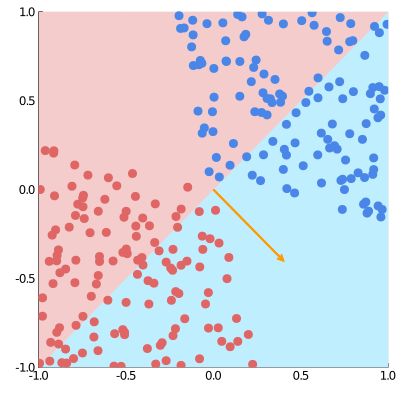

In [17]:
binary_contourf(x1, x2, forward, [lightred, lightblue]; xlim=(-1, 1), ylim=(-1, 1))
scatter_2d!(X_pos[1, :], X_pos[2, :], blue)
scatter_2d!(X_neg[1, :], X_neg[2, :], red)
quiver_2d!(p.w, orange)

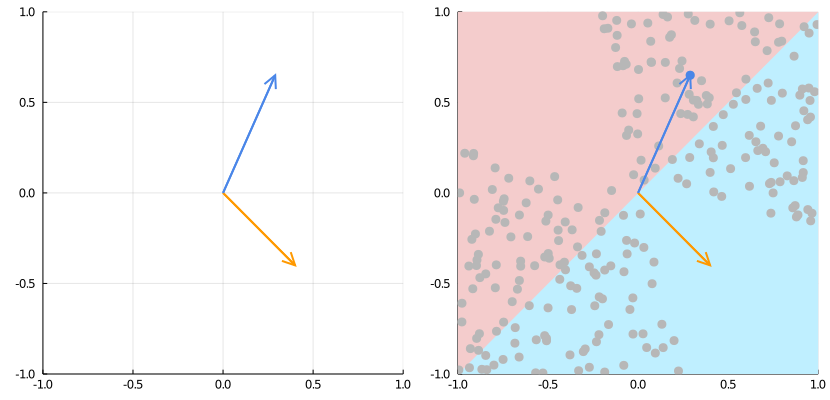

In [18]:
i = 44

quiver_2d(p.w, orange; xlim=(-1, 1), ylim=(-1, 1))
pa = quiver_2d!(X[:, i], blue)

binary_contourf(x1, x2, forward, [lightred, lightblue]; xlim=(-1, 1), ylim=(-1, 1))
scatter_2d!(X[1, :], X[2, :], gray)
quiver_2d!(p.w, orange)
quiver_2d!(X[:, i], blue)
pb = scatter_2d!([X[1, i]], [X[2, i]], blue)

plot(pa, pb, size=(830, 400))

┌ Info: Saved animation to 
│   fn = /Users/tyronjung/Desktop/deep_learning/perceptron/tmp.gif
└ @ Plots /Users/tyronjung/.julia/packages/Plots/LWw1t/src/animation.jl:104


Plots.AnimatedGif("/Users/tyronjung/Desktop/deep_learning/perceptron/tmp.gif")
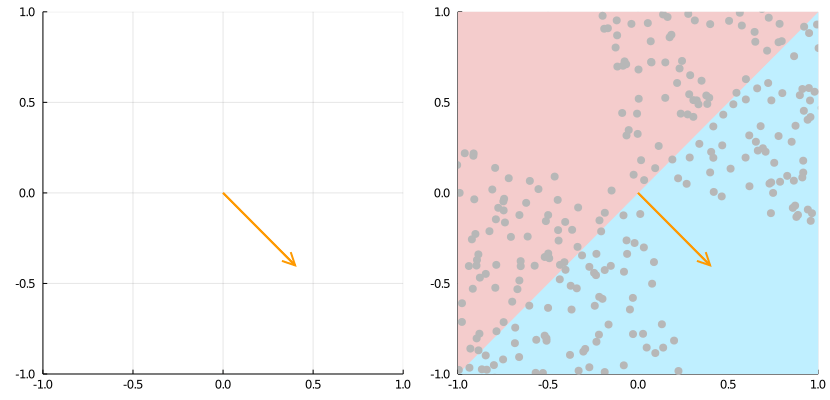

In [19]:
i = 44

animate_learning(i)

In [20]:
train!(p, X[:, i], T[i])

2-element Array{Float64,1}:
  0.4578874896669256
 -0.27002174121194

┌ Info: Saved animation to 
│   fn = /Users/tyronjung/Desktop/deep_learning/perceptron/tmp.gif
└ @ Plots /Users/tyronjung/.julia/packages/Plots/LWw1t/src/animation.jl:104


Plots.AnimatedGif("/Users/tyronjung/Desktop/deep_learning/perceptron/tmp.gif")
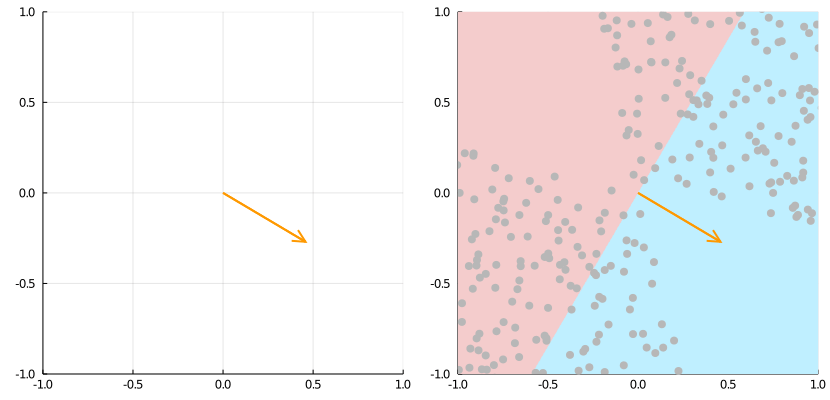

In [21]:
i = 192

animate_learning(i)

In [22]:
train!(p, X[:, i], T[i])

2-element Array{Float64,1}:
  0.4669015145861998
 -0.14128106121235748

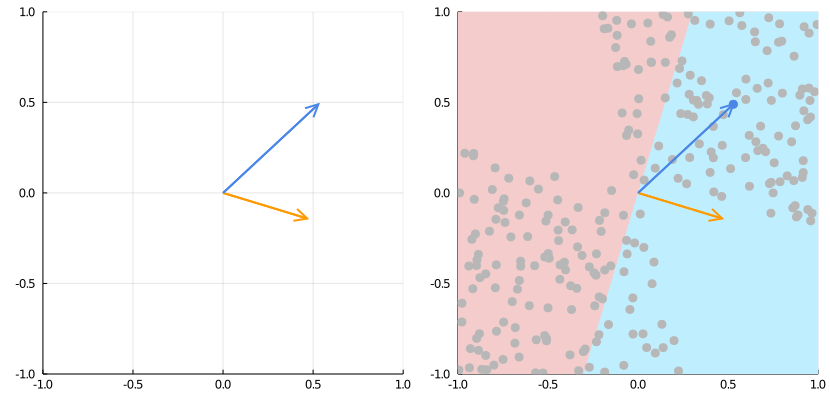

In [23]:
i = 76

quiver_2d(p.w, orange; xlim=(-1, 1), ylim=(-1, 1))
pa = quiver_2d!(X[:, i], blue)

binary_contourf(x1, x2, forward, [lightred, lightblue]; xlim=(-1, 1), ylim=(-1, 1))
scatter_2d!(X[1, :], X[2, :], gray)
quiver_2d!(p.w, orange)
quiver_2d!(X[:, i], blue)
pb = scatter_2d!([X[1, i]], [X[2, i]], blue)

plot(pa, pb, size=(830, 400))

┌ Info: Saved animation to 
│   fn = /Users/tyronjung/Desktop/deep_learning/perceptron/tmp.gif
└ @ Plots /Users/tyronjung/.julia/packages/Plots/LWw1t/src/animation.jl:104


Plots.AnimatedGif("/Users/tyronjung/Desktop/deep_learning/perceptron/tmp.gif")
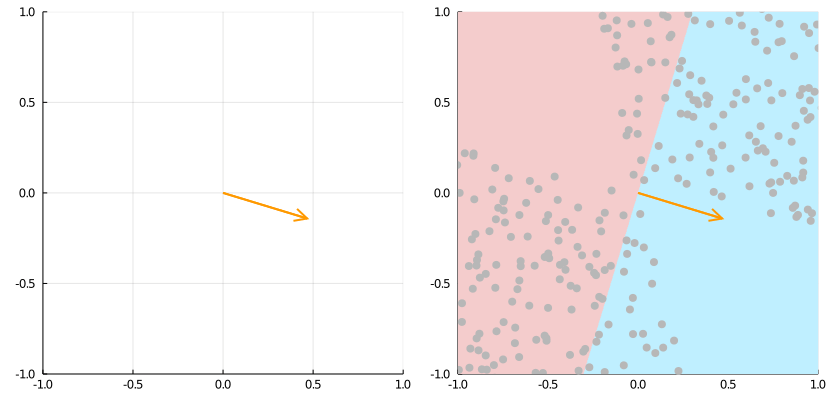

In [24]:
i = 53

animate_learning(i)

In [25]:
train!(p, X[:, i], T[i])

2-element Array{Float64,1}:
 0.4818201952869142
 0.002854049338695458

┌ Info: Saved animation to 
│   fn = /Users/tyronjung/Desktop/deep_learning/perceptron/tmp.gif
└ @ Plots /Users/tyronjung/.julia/packages/Plots/LWw1t/src/animation.jl:104


Plots.AnimatedGif("/Users/tyronjung/Desktop/deep_learning/perceptron/tmp.gif")
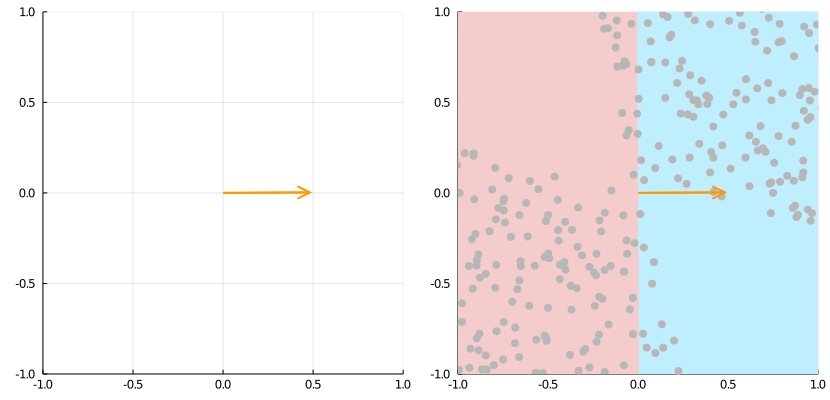

In [26]:
i = 175

animate_learning(i)

In [27]:
train!(p, X[:, i], T[i])

2-element Array{Float64,1}:
 0.4539227815900434
 0.17370877319700137

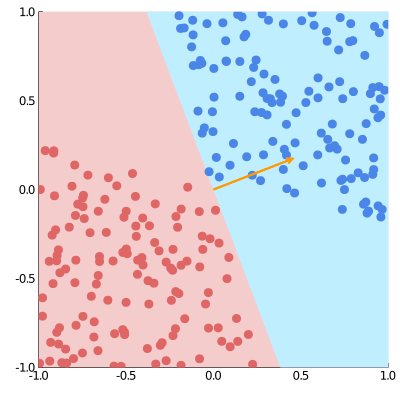

In [28]:
binary_contourf(x1, x2, forward, [lightred, lightblue]; xlim=(-1, 1), ylim=(-1, 1))
scatter_2d!(X_pos[1, :], X_pos[2, :], blue)
scatter_2d!(X_neg[1, :], X_neg[2, :], red)
quiver_2d!(p.w, orange)